## Import Libaries

In [1]:
# import all necessary libraries
import os
from utils.Copernicus import AdvancedCopernicus
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import folium
from pathlib import Path

# Ignore SettingWithCopyWarning:
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)


# Display all columns
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [2]:
START_DATE = "2022-12-03"
END_DATE = "2025-03-22"
OUTPUT_FILENAME = "output.nc"

BBOX = {
    # "minimum_longitude":9.10,
    # "maximum_longitude":30.20,
    # "minimum_latitude":53.10,
    # "maximum_latitude":65.00,
    "minimum_longitude": 9.1,
    "maximum_longitude": 23.0,
    "minimum_latitude": 53.5,
    "maximum_latitude": 60.0,
    # "minimum_longitude":9.85083510071235,
    # "maximum_longitude":10.926709174713364,
    # "minimum_latitude":54.25206332481298,
    # "maximum_latitude":54.97306793985031,
    "target_min_lon": 10.156,
    "target_max_lon": 10.170,
    "target_min_lat": 54.354,
    "target_max_lat": 54.365,
}

In [3]:
# Download Data
minimum_latitude = BBOX["minimum_latitude"]
maximum_latitude = BBOX["maximum_latitude"]
minimum_longitude = BBOX["minimum_longitude"]
maximum_longitude = BBOX["maximum_longitude"]

copernicus = AdvancedCopernicus()
ocean_points = 30
weather_points = 10


latitudes = np.linspace(minimum_latitude, maximum_latitude, weather_points)
longitudes = np.linspace(minimum_longitude, maximum_longitude, weather_points)


# zip latitudes and longitudes
coordinates = set([(float(lat), float(lon)) for lat in latitudes for lon in longitudes])
print(len(coordinates))

mean_lat = np.mean(latitudes)
mean_lon = np.mean(longitudes)
# plot the coordinates to folium
folium_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=5)
folium.Polygon(
    locations=[
        [minimum_latitude, minimum_longitude],
        [minimum_latitude, maximum_longitude],
        [maximum_latitude, maximum_longitude],
        [maximum_latitude, minimum_longitude],
        [minimum_latitude, minimum_longitude],
    ],
    color="orange",
).add_to(folium_map)
for lat, lon in coordinates:
    # plot the coordinates with dots

    # folium.Circle(location=[lat, lon], radius=30, color='red').add_to(folium_map)
    folium.CircleMarker(location=[lat, lon], radius=4, color="red").add_to(folium_map)
    # folium.Marker(location=[lat, lon], popup=f'lat: {lat}, lon: {lon}').add_to(folium_map)
folium_map

100


## Ocean Data

In [4]:
ocean_data_path = Path(f"../data/numerical_data/points{ocean_points}")
print(ocean_data_path)
weather_data_path = Path(f"../data/numerical_data/points{weather_points}")
print(weather_data_path)

../data/numerical_data/points30
../data/numerical_data/points10


In [5]:
# Daten die mit .nc enden
nc_files = [file for file in os.listdir(ocean_data_path) if file.endswith(".nc")]


# if df_weather{ocean_points}.nc exists, then remove it
if f"df_weather{ocean_points}.nc" in nc_files:
    nc_files.remove(f"df_weather{ocean_points}.nc")
    print(f"df_weather{ocean_points}.nc removed")

nc_files = sorted(nc_files)
nc_files

['cmems_mod_bal_phy_anfc_PT1H-i_2022-12-03-2025-03-22_lat53.724-lon14.372_points30.nc',
 'cmems_mod_bal_phy_anfc_PT1H-i_2022-12-03-2025-03-22_lat53.948-lon13.893_points30.nc',
 'cmems_mod_bal_phy_anfc_PT1H-i_2022-12-03-2025-03-22_lat53.948-lon14.372_points30.nc',
 'cmems_mod_bal_phy_anfc_PT1H-i_2022-12-03-2025-03-22_lat54.172-lon11.497_points30.nc',
 'cmems_mod_bal_phy_anfc_PT1H-i_2022-12-03-2025-03-22_lat54.172-lon11.976_points30.nc',
 'cmems_mod_bal_phy_anfc_PT1H-i_2022-12-03-2025-03-22_lat54.172-lon13.893_points30.nc',
 'cmems_mod_bal_phy_anfc_PT1H-i_2022-12-03-2025-03-22_lat54.172-lon14.372_points30.nc',
 'cmems_mod_bal_phy_anfc_PT1H-i_2022-12-03-2025-03-22_lat54.172-lon14.852_points30.nc',
 'cmems_mod_bal_phy_anfc_PT1H-i_2022-12-03-2025-03-22_lat54.172-lon15.331_points30.nc',
 'cmems_mod_bal_phy_anfc_PT1H-i_2022-12-03-2025-03-22_lat54.397-lon10.538_points30.nc',
 'cmems_mod_bal_phy_anfc_PT1H-i_2022-12-03-2025-03-22_lat54.397-lon11.017_points30.nc',
 'cmems_mod_bal_phy_anfc_PT1H-i_

In [6]:
df_ocean = pd.DataFrame()
for file in nc_files:
    data = xr.open_dataset(ocean_data_path / file)
    df = data.to_dataframe().reset_index()
    df_ocean = pd.concat([df_ocean, df], axis=0)
    data.close()
    # break


df_ocean.info(show_counts=True, verbose=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 9556314 entries, 0 to 20160
Data columns (total 15 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   depth      9556314 non-null  float32       
 1   latitude   9556314 non-null  float32       
 2   longitude  9556314 non-null  float32       
 3   time       9556314 non-null  datetime64[ns]
 4   bottomT    9415187 non-null  float32       
 5   mlotst     9415187 non-null  float32       
 6   siconc     9415187 non-null  float32       
 7   sithick    9415187 non-null  float32       
 8   sla        9415187 non-null  float32       
 9   so         9415187 non-null  float32       
 10  sob        9415187 non-null  float32       
 11  thetao     9415187 non-null  float32       
 12  uo         9415187 non-null  float32       
 13  vo         9415187 non-null  float32       
 14  wo         9415187 non-null  float32       
dtypes: datetime64[ns](1), float32(14)
memory usage: 656.2 MB

In [7]:
def process_df(df: pd.DataFrame) -> pd.DataFrame:
    # df = df.dropna(axis=1, how="all")
    # df = df.dropna(axis=0, how="any")
    # drop cols with lot of missing values
    # df = df.drop(columns=['depth'], axis=1)
    df = df[["time"] + [col for col in df.columns if col != "time"]]
    float_cols = df.select_dtypes(include=["float"]).columns
    df[float_cols] = df[float_cols].astype(np.float32)
    df["time"] = pd.to_datetime(df["time"]).dt.tz_localize(None).dt.round("h")

    # df = df.groupby(by=['time', 'latitude', 'longitude']).mean().reset_index()
    df = df.reset_index(drop=True)

    return df

In [8]:

def check_missing_times(df: pd.DataFrame) -> None:
    # Zeitdifferenzen berechnen
    time_diff = df["time"].diff()

    # Falls der Zeitabstand konstant sein sollte (z. B. 1 Stunde), prüfe Abweichungen:
    expected_interval = pd.Timedelta(hours=1)  # Anpassen je nach erwartetem Intervall
    missing_times = df["time"][time_diff > expected_interval]

    # Fehlende Zeitpunkte ausgeben
    if missing_times.empty:
        print("Keine fehlenden Zeitpunkte!")
    else:
        print("Fehlende Zeitpunkte erkannt:")
        print(missing_times)

def show_df(df: pd.DataFrame) -> None:
    # show the first 5 rows of the dataframe
    display(df.head())
    # show the last 5 rows of the dataframe
    display(df.tail())

    # show columns
    print("Columns:", df.columns.tolist())

    unique_coordinates = df[["latitude", "longitude"]].drop_duplicates()
    n_unique_coordinates = len(unique_coordinates)
    print(f"Number of unique coordinates: {n_unique_coordinates}")
    print(df.info(show_counts=True, verbose=True, memory_usage="deep"))
    print(df.isna().sum())
    display(df.describe())

    check_missing_times(df)




In [9]:
df_ocean = df_ocean.dropna(axis=1, how="all")
df_ocean = df_ocean.dropna(axis=0, how="any")
df_ocean = df_ocean.drop(columns=["depth"], axis=1)
df_ocean = process_df(df_ocean)

show_df(df_ocean)

,time,latitude,longitude,bottomT,mlotst,siconc,sithick,sla,so,sob,thetao,uo,vo,wo
0,2022-12-03 00:00:00,53.724953,14.374895,3.410156,3.995598,0.0,0.0,-0.143757,0.014952,0.014953,3.406551,-0.009616,0.001145,5.893584e-08
1,2022-12-03 01:00:00,53.724953,14.374895,3.396963,3.995263,0.0,0.0,-0.144093,0.014947,0.014947,3.393593,-0.015878,0.007352,1.211367e-07
2,2022-12-03 02:00:00,53.724953,14.374895,3.385111,3.988039,0.0,0.0,-0.151317,0.014940,0.014941,3.379974,-0.014326,0.008486,1.183891e-07
3,2022-12-03 03:00:00,53.724953,14.374895,3.373137,3.993156,0.0,0.0,-0.146199,0.014927,0.014929,3.367593,-0.008735,0.001938,9.702487e-08
4,2022-12-03 04:00:00,53.724953,14.374895,3.353949,4.000775,0.0,0.0,-0.138580,0.014919,0.014920,3.349022,0.002424,-0.005228,1.172617e-07


,time,latitude,longitude,bottomT,mlotst,siconc,sithick,sla,so,sob,thetao,uo,vo,wo
9415182,2025-03-21 20:00:00,60.008183,22.986214,1.240906,9.966438,0.0,0.0,-0.165247,3.858200,4.509239,1.731531,-0.021636,-0.006870,7.547917e-09
9415183,2025-03-21 21:00:00,60.008183,22.986214,1.239942,9.963586,0.0,0.0,-0.168364,3.857321,4.508060,1.688581,-0.018138,-0.002554,8.625824e-09
9415184,2025-03-21 22:00:00,60.008183,22.986214,1.239102,9.977518,0.0,0.0,-0.153143,3.858922,4.507098,1.644180,-0.012949,0.004255,8.859505e-09
9415185,2025-03-21 23:00:00,60.008183,22.986214,1.238123,9.996614,0.0,0.0,-0.132281,3.861946,4.505925,1.587591,-0.010488,0.009695,9.152139e-09
9415186,2025-03-22 00:00:00,60.008183,22.986214,1.236666,10.005527,0.0,0.0,-0.122543,3.865010,4.503971,1.519571,-0.014191,0.010449,1.010761e-08


Columns: ['time', 'latitude', 'longitude', 'bottomT', 'mlotst', 'siconc', 'sithick', 'sla', 'so', 'sob', 'thetao', 'uo', 'vo', 'wo']
Number of unique coordinates: 467
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9415187 entries, 0 to 9415186
Data columns (total 14 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   time       9415187 non-null  datetime64[ns]
 1   latitude   9415187 non-null  float32       
 2   longitude  9415187 non-null  float32       
 3   bottomT    9415187 non-null  float32       
 4   mlotst     9415187 non-null  float32       
 5   siconc     9415187 non-null  float32       
 6   sithick    9415187 non-null  float32       
 7   sla        9415187 non-null  float32       
 8   so         9415187 non-null  float32       
 9   sob        9415187 non-null  float32       
 10  thetao     9415187 non-null  float32       
 11  uo         9415187 non-null  float32       
 12  vo         9415187 non-null  

,time,latitude,longitude,bottomT,mlotst,siconc,sithick,sla,so,sob,thetao,uo,vo,wo
count,9415187,9.415187e+06,9.415187e+06,9.415187e+06,9.415187e+06,9.415187e+06,9.415187e+06,9.415187e+06,9.415187e+06,9.415187e+06,9.415187e+06,9.415187e+06,9.415187e+06,9.415187e+06
mean,2024-01-26 23:59:59.999999488,5.685889e+01,1.676760e+01,7.142221e+00,1.883143e+01,4.653668e-03,1.165215e-03,-8.410597e-02,1.033531e+01,1.310118e+01,9.481163e+00,5.142779e-03,7.155766e-03,-2.093416e-07
min,2022-12-03 00:00:00,5.372495e+01,9.097137e+00,-1.025859e+00,1.725482e+00,0.000000e+00,0.000000e+00,-1.665636e+00,-7.644224e-02,-3.166307e-02,-1.552042e+00,-1.303928e+00,-1.284338e+00,-8.305990e-04
25%,2023-07-01 00:00:00,5.550826e+01,1.340268e+01,4.826166e+00,1.008458e+01,0.000000e+00,0.000000e+00,-2.219568e-01,6.920894e+00,7.460144e+00,4.269635e+00,-5.007034e-02,-5.180125e-02,-8.427258e-08
50%,2024-01-27 00:00:00,5.685824e+01,1.773605e+01,6.299991e+00,1.190891e+01,0.000000e+00,0.000000e+00,-7.363505e-02,7.301487e+00,9.722097e+00,7.717205e+00,3.423821e-03,3.016098e-03,8.217322e-08
75%,2024-08-24 00:00:00,5.799155e+01,2.012502e+01,7.877824e+00,2.635475e+01,0.000000e+00,0.000000e+00,4.439254e-02,8.100474e+00,1.257764e+01,1.543641e+01,5.991423e-02,6.100779e-02,7.934436e-07
max,2025-03-22 00:00:00,6.000818e+01,2.298621e+01,2.559764e+01,4.993846e+02,9.970000e-01,6.831686e-01,1.438694e+00,3.619087e+01,4.111121e+01,2.566385e+01,1.356585e+00,1.272928e+00,1.299576e-04
std,NaN,1.578268e+00,3.926184e+00,3.847275e+00,1.339984e+01,5.997982e-02,1.397772e-02,1.977233e-01,7.345524e+00,9.158420e+00,5.932123e+00,1.178498e-01,1.184497e-01,9.057704e-06


Keine fehlenden Zeitpunkte!


## Weather

In [10]:
# file_path = numerical_data_path / f'df_weather{weather_points}.nc'
# df_weather = xr.open_dataset(file_path).to_dataframe().reset_index()

file_path = weather_data_path / f"df_weather{weather_points}.csv"
df_weather = pd.read_csv(file_path)

print(df_weather.info(verbose=True, show_counts=True, memory_usage="deep"))
display(df_weather.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018400 entries, 0 to 2018399
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   time                        2018400 non-null  object 
 1   latitude                    2018400 non-null  float64
 2   longitude                   2018400 non-null  float64
 3   temperature_2m              2018400 non-null  float64
 4   relative_humidity_2m        2018400 non-null  float64
 5   dew_point_2m                2018400 non-null  float64
 6   apparent_temperature        2018400 non-null  float64
 7   precipitation               2018400 non-null  float64
 8   rain                        2018400 non-null  float64
 9   showers                     2018400 non-null  float64
 10  snowfall                    2018400 non-null  float64
 11  weather_code                2018400 non-null  float64
 12  pressure_msl                2018400 non-null  float64
 1

,time,latitude,longitude,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,showers,snowfall,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_direction_10m,wind_gusts_10m
0,2022-12-03 00:00:00,54.938488,12.166998,4.337,79.126850,1.037,-1.760069,0.0,0.0,0.0,0.0,3.0,1029.4,1027.8805,100.0,100.0,100.0,89.0,0.027642,0.174289,28.373846,54.293217,53.280000
1,2022-12-03 01:00:00,54.938488,12.166998,4.137,81.112920,1.187,-2.126686,0.1,0.1,0.0,0.0,51.0,1029.2,1027.6797,100.0,100.0,100.0,27.0,0.024795,0.155512,29.686360,50.906155,48.960000
2,2022-12-03 02:00:00,54.938488,12.166998,4.287,80.843124,1.287,-1.999586,0.1,0.1,0.0,0.0,51.0,1029.0,1027.4807,100.0,100.0,99.0,42.0,0.025658,0.159400,29.957968,57.264786,50.399998
3,2022-12-03 03:00:00,54.938488,12.166998,4.087,78.521065,0.687,-2.143030,0.0,0.0,0.0,0.0,3.0,1028.7,1027.1800,100.0,100.0,100.0,99.0,0.028692,0.176232,28.894344,59.281166,49.680000
4,2022-12-03 04:00:00,54.938488,12.166998,4.137,75.196915,0.137,-1.981791,0.0,0.0,0.0,0.0,3.0,1028.4,1026.8810,100.0,100.0,100.0,100.0,0.033386,0.204220,27.534704,64.440094,48.239998


In [11]:
df_weather = process_df(df_weather)
# df_weather = df_weather.dropna(axis=1, how="all")
# df_weather = df_weather.dropna(axis=0, how="any")

show_df(df_weather)


,time,latitude,longitude,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,showers,snowfall,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_direction_10m,wind_gusts_10m
0,2022-12-03 00:00:00,54.938488,12.166998,4.337,79.126846,1.037,-1.760069,0.0,0.0,0.0,0.0,3.0,1029.400024,1027.880493,100.0,100.0,100.0,89.0,0.027642,0.174289,28.373846,54.293217,53.279999
1,2022-12-03 01:00:00,54.938488,12.166998,4.137,81.112923,1.187,-2.126686,0.1,0.1,0.0,0.0,51.0,1029.199951,1027.679688,100.0,100.0,100.0,27.0,0.024795,0.155512,29.686359,50.906155,48.959999
2,2022-12-03 02:00:00,54.938488,12.166998,4.287,80.843124,1.287,-1.999586,0.1,0.1,0.0,0.0,51.0,1029.000000,1027.480713,100.0,100.0,99.0,42.0,0.025658,0.159400,29.957968,57.264786,50.399998
3,2022-12-03 03:00:00,54.938488,12.166998,4.087,78.521065,0.687,-2.143030,0.0,0.0,0.0,0.0,3.0,1028.699951,1027.180054,100.0,100.0,100.0,99.0,0.028692,0.176232,28.894344,59.281166,49.680000
4,2022-12-03 04:00:00,54.938488,12.166998,4.137,75.196915,0.137,-1.981791,0.0,0.0,0.0,0.0,3.0,1028.400024,1026.880981,100.0,100.0,100.0,100.0,0.033386,0.204220,27.534704,64.440094,48.239998


,time,latitude,longitude,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,showers,snowfall,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_direction_10m,wind_gusts_10m
2018395,2025-03-22 19:00:00,57.820736,16.753246,3.85,84.339890,1.45,-1.453786,0.0,0.0,0.0,0.0,0.0,1028.300049,1028.300049,0.0,0.0,0.0,0.0,0.014923,0.126370,23.406229,91.321953,30.239998
2018396,2025-03-22 20:00:00,57.820736,16.753246,3.85,83.138748,1.25,-1.600677,0.0,0.0,0.0,0.0,0.0,1028.000000,1028.000000,0.0,0.0,0.0,0.0,0.017347,0.136063,24.183052,98.130020,30.599998
2018397,2025-03-22 21:00:00,57.820736,16.753246,4.05,82.866226,1.40,-1.396805,0.0,0.0,0.0,0.0,0.0,1027.800049,1027.800049,0.0,0.0,0.0,0.0,0.018082,0.140218,24.329315,105.887238,30.599998
2018398,2025-03-22 22:00:00,57.820736,16.753246,4.35,80.851936,1.35,-1.190087,0.0,0.0,0.0,0.0,0.0,1027.400024,1027.400024,0.0,0.0,0.0,0.0,0.022108,0.160031,24.911634,113.416046,31.680000
2018399,2025-03-22 23:00:00,57.820736,16.753246,4.50,79.151413,1.20,-1.024518,0.0,0.0,0.0,0.0,0.0,1027.000000,1027.000000,0.0,0.0,0.0,0.0,0.024853,0.176081,24.633049,116.939445,31.319998


Columns: ['time', 'latitude', 'longitude', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 'showers', 'snowfall', 'weather_code', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m', 'wind_direction_10m', 'wind_gusts_10m']
Number of unique coordinates: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018400 entries, 0 to 2018399
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   time                        2018400 non-null  datetime64[ns]
 1   latitude                    2018400 non-null  float32       
 2   longitude                   2018400 non-null  float32       
 3   temperature_2m              2018400 non-null  float32       
 4   relative_humidity_2m        2018400 non

,time,latitude,longitude,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,showers,snowfall,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_direction_10m,wind_gusts_10m
count,2018400,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06,2018400.0,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06,2.018400e+06
mean,2024-01-27 11:30:00.000001536,5.675219e+01,1.606228e+01,7.863672e+00,8.084811e+01,4.484694e+00,4.265367e+00,9.403422e-02,7.855469e-02,0.0,1.086054e-02,1.253946e+01,1.013017e+03,1.005390e+03,6.872610e+01,4.074061e+01,3.335294e+01,4.266039e+01,6.939780e-02,2.635497e-01,1.797662e+01,1.938843e+02,3.048960e+01
min,2022-12-03 00:00:00,5.353251e+01,8.979118e+00,-3.330350e+01,1.229409e+01,-3.580350e+01,-3.844448e+01,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,9.579000e+02,8.762991e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.824665e-01,3.600000e-01
25%,2023-07-01 05:45:00,5.493849e+01,1.222792e+01,2.221500e+00,7.347512e+01,-3.000000e-01,-2.860585e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,1.005500e+03,9.967036e+02,2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.823437e-03,7.097840e-02,9.965239e+00,1.216075e+02,1.908000e+01
50%,2024-01-27 11:30:00,5.676625e+01,1.603017e+01,6.650000e+00,8.392735e+01,3.950000e+00,2.410487e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,3.000000e+00,1.013700e+03,1.007700e+03,9.900000e+01,1.700000e+01,7.000000e+00,1.800000e+01,2.707617e-02,1.545327e-01,1.553015e+01,2.112637e+02,2.844000e+01
75%,2024-08-24 17:15:00,5.852372e+01,1.990181e+01,1.440000e+01,9.128604e+01,1.026500e+01,1.222969e+01,0.000000e+00,0.000000e+00,0.0,0.000000e+00,3.000000e+00,1.021200e+03,1.016868e+03,1.000000e+02,1.000000e+02,8.100000e+01,9.900000e+01,8.146853e-02,3.245316e-01,2.362393e+01,2.642177e+02,3.960000e+01
max,2025-03-22 23:00:00,6.000000e+01,2.309734e+01,3.393050e+01,1.000000e+02,2.416500e+01,3.468115e+01,2.610000e+01,2.610000e+01,0.0,4.200000e+00,7.500000e+01,1.052000e+03,1.052000e+03,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,7.007209e-01,3.658855e+00,8.853987e+01,3.600000e+02,1.231200e+02
std,NaN,2.068218e+00,4.440003e+00,7.641475e+00,1.401187e+01,6.973755e+00,9.233553e+00,3.782145e-01,3.577255e-01,0.0,8.137128e-02,2.205626e+01,1.179669e+01,1.742536e+01,4.011200e+01,4.367327e+01,4.111896e+01,4.487413e+01,1.017334e-01,3.185597e-01,1.083381e+01,9.227612e+01,1.496649e+01


Keine fehlenden Zeitpunkte!


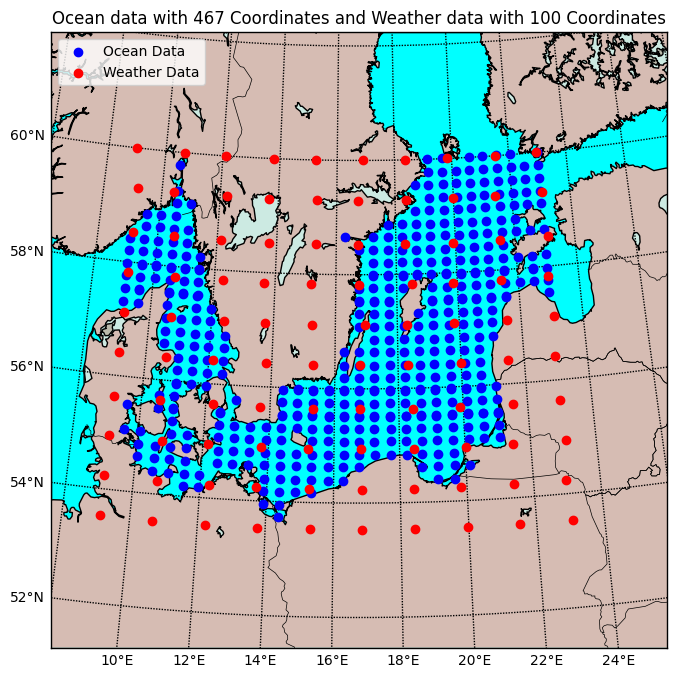

In [12]:
from mpl_toolkits.basemap import Basemap
import numpy as np

puffer = 0.5  # Puffer für das Polygon

ocean_number_coords = len(df_ocean[["latitude", "longitude"]].drop_duplicates())
weather_number_coords = len(df_weather[["latitude", "longitude"]].drop_duplicates())

# Beispiel Koordinaten für das Polygon
polygon_coords = [
    [minimum_latitude - puffer, minimum_longitude - puffer],
    [minimum_latitude - puffer, maximum_longitude + puffer],
    [maximum_latitude + puffer, maximum_longitude + puffer],
    [maximum_latitude + puffer, minimum_longitude - puffer],
    [minimum_latitude - puffer, minimum_longitude - puffer],  # Zurück zum Startpunkt
]

# Ozean- und Wetterdaten vorbereiten
ocean_coordinates = df_ocean[["latitude", "longitude"]].drop_duplicates()
weather_coordinates = df_weather[["latitude", "longitude"]].drop_duplicates()

# Mittelwerte der Koordinaten berechnen
mean_lat = ocean_coordinates["latitude"].mean()
mean_lon = ocean_coordinates["longitude"].mean()

# Karte mit Basemap erstellen
plt.figure(figsize=(10, 8))

m = Basemap(
    projection="lcc",
    resolution="i",
    lat_0=mean_lat,
    lon_0=mean_lon,
    width=1.2e6,
    height=1.2e6,
)

# Küste und Länder hinzufügen
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color="0.8")
m.drawstates()
m.drawmapboundary(fill_color="aqua")
m.fillcontinents(color="coral", lake_color="aqua", alpha=0.2)

# Ozeandaten als blaue Punkte hinzufügen
x_ocean, y_ocean = m(
    ocean_coordinates["longitude"].values, ocean_coordinates["latitude"].values
)
m.scatter(x_ocean, y_ocean, color="blue", label="Ocean Data", zorder=5)


# Wetterdaten als rote Punkte hinzufügen
x_weather, y_weather = m(
    weather_coordinates["longitude"].values, weather_coordinates["latitude"].values
)
m.scatter(x_weather, y_weather, color="red", label="Weather Data", zorder=5)


# # Polygon hinzufügen
# polygon_coords = np.array(polygon_coords)
# x_poly, y_poly = m(polygon_coords[:, 1], polygon_coords[:, 0])  # Longitude, Latitude -> x, y
# m.plot(x_poly, y_poly, color='grey', linewidth=2, label="Polygon")

# Beschriftung der Achsen und Titel
plt.title(
    f"Ocean data with {len(ocean_coordinates)} Coordinates and Weather data with {len(weather_coordinates)} Coordinates"
)
plt.legend(loc="upper left")


# show

# "minimum_longitude":9.1,
# "maximum_longitude":23.0,
# "minimum_latitude":53.5,
# "maximum_latitude":60.0,
# m.drawparallels(np.arange(minimum_latitude-0.5,maximum_latitude+1,0.5),labels=[1,0,0,0])
# m.drawmeridians(np.arange(minimum_longitude-0.1,maximum_longitude+1,1),labels=[0,0,0,1])

m.drawparallels(np.arange(0, 360, 2), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(0, 350, 2), labels=[0, 0, 0, 1])

# Speichern des Plots als PNG-Datei
plt.savefig(
    f"map_oceanpoints_{ocean_number_coords}_weatherpoints_{weather_number_coords}.png",
    dpi=300,
)  # Hier wird die Karte als PNG mit einer Auflösung von 300 dpi gespeichert

# Zeigen der Karte
plt.show()


In [13]:
# convert df_ocean to xarray
ds_ocean = df_ocean.set_index(["time", "latitude", "longitude"]).to_xarray()
ds_ocean

<xarray.Dataset> Size: 878MB
Dimensions:    (time: 20161, latitude: 33, longitude: 30)
Coordinates:
  * time       (time) datetime64[ns] 161kB 2022-12-03 ... 2025-03-22
  * latitude   (latitude) float32 132B 53.72 53.94 54.17 ... 59.56 59.77 60.01
  * longitude  (longitude) float32 120B 9.097 9.569 10.04 ... 22.04 22.51 22.99
Data variables:
    bottomT    (time, latitude, longitude) float32 80MB nan nan ... nan 1.237
    mlotst     (time, latitude, longitude) float32 80MB nan nan ... nan 10.01
    siconc     (time, latitude, longitude) float32 80MB nan nan nan ... nan 0.0
    sithick    (time, latitude, longitude) float32 80MB nan nan nan ... nan 0.0
    sla        (time, latitude, longitude) float32 80MB nan nan ... nan -0.1225
    so         (time, latitude, longitude) float32 80MB nan nan ... nan 3.865
    sob        (time, latitude, longitude) float32 80MB nan nan ... nan 4.504
    thetao     (time, latitude, longitude) float32 80MB nan nan nan ... nan 1.52
    uo         (time, latitude, longitude) float32 80MB nan nan ... nan -0.01419
    vo         (time, latitude, longitude) float32 80MB nan nan ... nan 0.01045
    wo         (time, latitude, longitude) float32 80MB nan nan ... 1.011e-08

In [14]:
# # plot sla on 2023-12-20

# ds_ocean_date = ds_ocean.sel(time='2023-10-20')
# ds_ocean_date

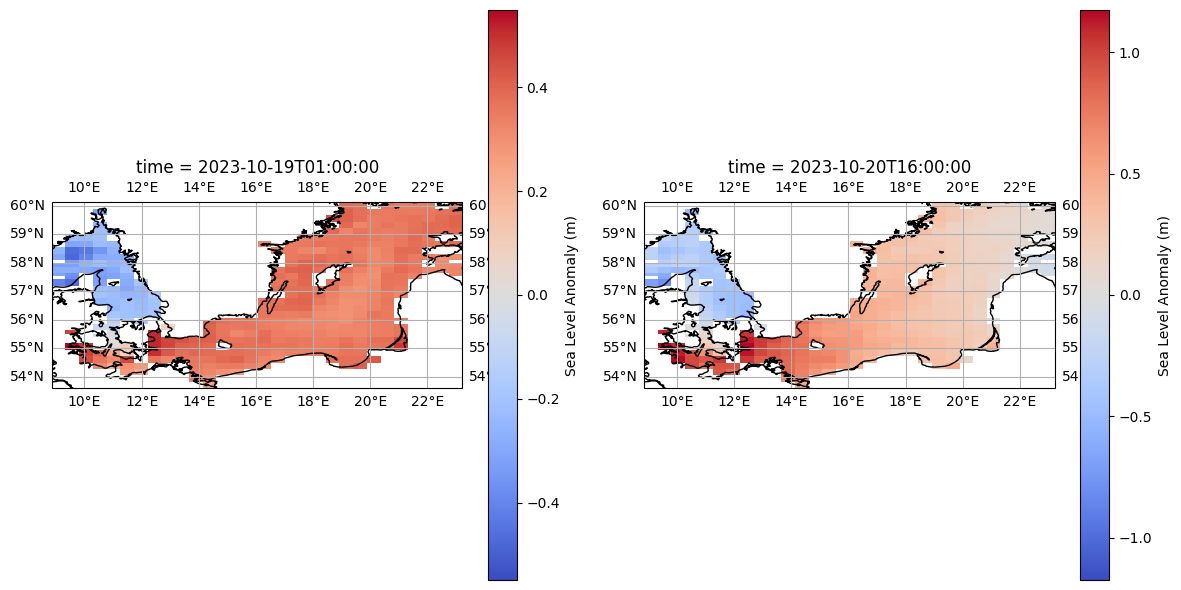

In [15]:
import cartopy.crs as ccrs

# Wähle zwei Zeitpunkte aus (z.B. Zeitpunkt 0 und 1)
sla_time_0 = ds_ocean["sla"].sel(time="2023-10-19T01:00:00")
sla_time_1 = ds_ocean["sla"].sel(time="2023-10-20T16:00:00")


# Erstelle eine Figur und Achsen für die Karten
fig, axes = plt.subplots(
    1, 2, figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()}
)

# Definiere die Kartenachse für den ersten Zeitpunkt (time=0)
ax0 = axes[0]
ax0.set_title("Sea Level Anomaly at Time 0")
ax0.coastlines()
sla_time_0.plot(ax=ax0, cmap="coolwarm", cbar_kwargs={"label": "Sea Level Anomaly (m)"})

# Definiere die Kartenachse für den zweiten Zeitpunkt (time=1)
ax1 = axes[1]
ax1.set_title("Sea Level Anomaly at Time 1")
ax1.coastlines()
sla_time_1.plot(ax=ax1, cmap="coolwarm", cbar_kwargs={"label": "Sea Level Anomaly (m)"})


# show lat and lon with grid
ax0.gridlines(draw_labels=True)
ax1.gridlines(draw_labels=True)
# Zeige die Karte an
plt.tight_layout()
plt.show()

In [16]:
ds_weather = df_weather.set_index(["time", "latitude", "longitude"]).to_xarray()
ds_weather


<xarray.Dataset> Size: 2GB
Dimensions:                     (time: 20184, latitude: 10, longitude: 99)
Coordinates:
  * time                        (time) datetime64[ns] 161kB 2022-12-03 ... 20...
  * latitude                    (latitude) float32 40B 53.53 54.24 ... 59.3 60.0
  * longitude                   (longitude) float32 396B 8.979 9.12 ... 23.1
Data variables: (12/20)
    temperature_2m              (time, latitude, longitude) float32 80MB nan ...
    relative_humidity_2m        (time, latitude, longitude) float32 80MB nan ...
    dew_point_2m                (time, latitude, longitude) float32 80MB nan ...
    apparent_temperature        (time, latitude, longitude) float32 80MB nan ...
    precipitation               (time, latitude, longitude) float32 80MB nan ...
    rain                        (time, latitude, longitude) float32 80MB nan ...
    ...                          ...
    cloud_cover_high            (time, latitude, longitude) float32 80MB nan ...
    et0_fao_evapotranspiration  (time, latitude, longitude) float32 80MB nan ...
    vapour_pressure_deficit     (time, latitude, longitude) float32 80MB nan ...
    wind_speed_10m              (time, latitude, longitude) float32 80MB nan ...
    wind_direction_10m          (time, latitude, longitude) float32 80MB nan ...
    wind_gusts_10m              (time, latitude, longitude) float32 80MB nan ...

In [17]:
timepoint = "2023-10-20T12:00:00"

100%|██████████| 2500/2500 [00:12<00:00, 192.50it/s]


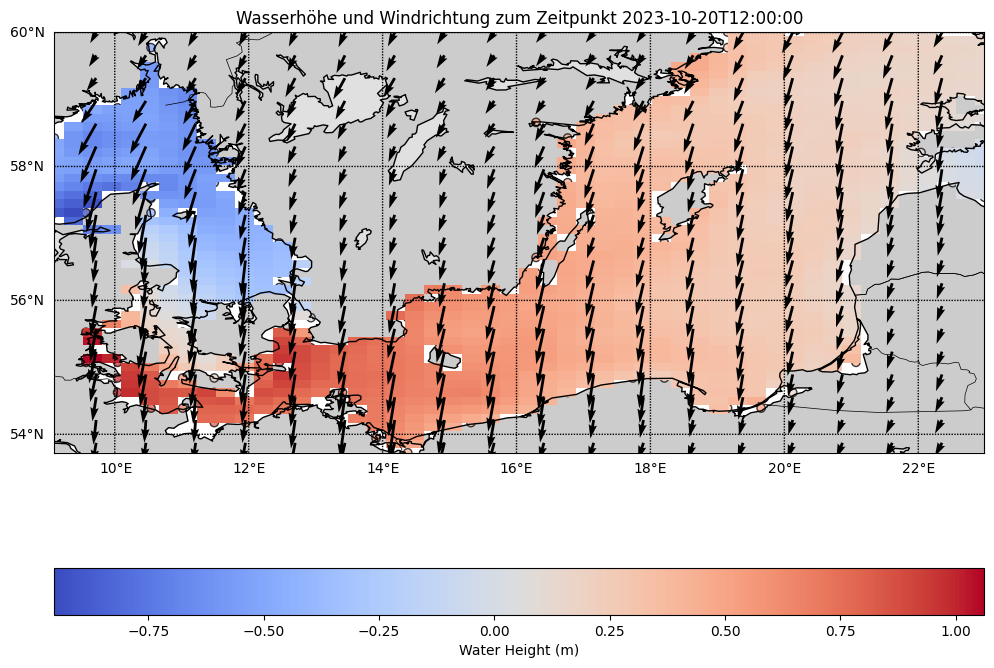

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata
import cartopy.feature as cfeature
import shapely.geometry
from joblib import Parallel, delayed
from tqdm import tqdm


# Funktion zur Landprüfung mit Cartopy
def is_on_land(lon, lat):
    land = cfeature.NaturalEarthFeature("physical", "land", "10m")
    for geom in land.geometries():
        if geom.contains(shapely.geometry.Point(lon, lat)):
            return True
    return False


# Funktion zum Erstellen der Landmaske
def create_land_mask(lon_grid, lat_grid):
    coords_list = [(lon, lat) for lat in lat_grid for lon in lon_grid]
    mask_flat = Parallel(n_jobs=-1)(
        delayed(lambda p: not is_on_land(*p))(p) for p in tqdm(coords_list)
    )
    return np.array(mask_flat).reshape(len(lat_grid), len(lon_grid))


# Daten filtern
df_weather_time = df_weather[df_weather["time"] == timepoint]
df_ocean_time = df_ocean[df_ocean["time"] == timepoint]

# Gitter für Ozeandaten
grid_size = 50
lon_grid = np.linspace(
    df_ocean_time["longitude"].min(), df_ocean_time["longitude"].max(), grid_size
)
lat_grid = np.linspace(
    df_ocean_time["latitude"].min(), df_ocean_time["latitude"].max(), grid_size
)
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# Interpolation der SLA-Werte
sla_grid = griddata(
    (df_ocean_time["longitude"], df_ocean_time["latitude"]),
    df_ocean_time["sla"],
    (lon_mesh, lat_mesh),
    method="linear",
)

# Basemap erstellen
fig, ax = plt.subplots(figsize=(12, 10))
m = Basemap(
    projection="cyl",
    resolution="i",
    llcrnrlon=lon_grid.min(),
    urcrnrlon=lon_grid.max(),
    llcrnrlat=lat_grid.min(),
    urcrnrlat=lat_grid.max(),
    ax=ax,
)
m.fillcontinents(color="grey", lake_color="white", alpha=0.4)

m.drawcoastlines()
m.drawcountries()

# Landmaske berechnen und anwenden
mask = create_land_mask(lon_grid, lat_grid)
sla_grid[~mask] = np.nan

# Scatterplot für Ozeandaten
x, y = m(df_ocean_time["longitude"].values, df_ocean_time["latitude"].values)
m.scatter(x, y, c=df_ocean_time["sla"], cmap="coolwarm", edgecolor="k", alpha=0.75)

# Heatmap für interpolierte SLA-Werte
x_mesh, y_mesh = m(lon_mesh, lat_mesh)
heatmap = m.pcolormesh(x_mesh, y_mesh, sla_grid, cmap="coolwarm", shading="auto")
plt.colorbar(heatmap, ax=ax, orientation="horizontal", label="Water Height (m)")

# Gitter für Winddaten
wind_grid_size = 20
lon_grid_wind = np.linspace(
    df_weather_time["longitude"].min(),
    df_weather_time["longitude"].max(),
    wind_grid_size,
)
lat_grid_wind = np.linspace(
    df_weather_time["latitude"].min(), df_weather_time["latitude"].max(), wind_grid_size
)
lon_mesh_wind, lat_mesh_wind = np.meshgrid(lon_grid_wind, lat_grid_wind)

# Interpolation der Windgeschwindigkeit und -richtung
wind_speed_grid = griddata(
    (df_weather_time["longitude"], df_weather_time["latitude"]),
    df_weather_time["wind_speed_10m"],
    (lon_mesh_wind, lat_mesh_wind),
    method="linear",
)
wind_dir_grid = griddata(
    (df_weather_time["longitude"], df_weather_time["latitude"]),
    df_weather_time["wind_direction_10m"],
    (lon_mesh_wind, lat_mesh_wind),
    method="linear",
)

# Windvektoren berechnen und plotten
u = wind_speed_grid * -np.cos(np.deg2rad(wind_dir_grid))
v = wind_speed_grid * -np.sin(np.deg2rad(wind_dir_grid))
x_wind, y_wind = m(lon_mesh_wind, lat_mesh_wind)
m.quiver(x_wind, y_wind, u, v, scale=1500, color="black")

m.drawparallels(np.arange(0, 360, 2), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(0, 350, 2), labels=[0, 0, 0, 1])


plt.title(f"Wasserhöhe und Windrichtung zum Zeitpunkt {timepoint}")
plt.show()


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata


class WindWaterMap:
    def __init__(
        self,
        df_weather,
        df_ocean,
        timepoint,
        ocean_feature,
        ocean_grid_size=100,
        weather_grid_size=20,
        title=None,
    ):
        self.df_weather = df_weather
        self.df_ocean = df_ocean
        self.timepoint = timepoint
        self.ocean_feature = ocean_feature
        self.ocean_grid_size = ocean_grid_size
        self.weather_grid_size = weather_grid_size
        self.title = title

    # Funktion zur Landprüfung mit Cartopy
    def is_on_land(self, lon, lat):
        land = cfeature.NaturalEarthFeature("physical", "land", "10m")
        for geom in land.geometries():
            if geom.contains(shapely.geometry.Point(lon, lat)):
                return True
        return False

    # Funktion zum Erstellen der Landmaske
    def create_land_mask(self, lon_grid, lat_grid):
        coords_list = [(lon, lat) for lat in lat_grid for lon in lon_grid]
        mask_flat = Parallel(n_jobs=-1)(
            delayed(lambda p: not is_on_land(*p))(p) for p in tqdm(coords_list)
        )
        return np.array(mask_flat).reshape(len(lat_grid), len(lon_grid))

    def plot(self):
        # Daten filtern
        df_weather_time = self.df_weather[self.df_weather["time"] == timepoint]
        df_ocean_time = self.df_ocean[self.df_ocean["time"] == timepoint]

        # Gitter für Ozeandaten
        grid_size = 500
        lon_grid = np.linspace(
            df_ocean_time["longitude"].min(),
            df_ocean_time["longitude"].max(),
            self.ocean_grid_size,
        )
        lat_grid = np.linspace(
            df_ocean_time["latitude"].min(),
            df_ocean_time["latitude"].max(),
            self.ocean_grid_size,
        )
        lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

        # Interpolation der SLA-Werte
        sla_grid = griddata(
            (df_ocean_time[self.ocean_feature], df_ocean_time["latitude"]),
            df_ocean_time[self.ocean_feature],
            (lon_mesh, lat_mesh),
            method="linear",
        )

        # Basemap erstellen
        fig, ax = plt.subplots(figsize=(12, 10))
        m = Basemap(
            projection="cyl",
            resolution="i",
            llcrnrlon=lon_grid.min(),
            urcrnrlon=lon_grid.max(),
            llcrnrlat=lat_grid.min(),
            urcrnrlat=lat_grid.max(),
            ax=ax,
        )
        m.fillcontinents(color="grey", lake_color="white", alpha=0.4)

        m.drawcoastlines()
        m.drawcountries()

        # Landmaske berechnen und anwenden
        mask = create_land_mask(lon_grid, lat_grid)
        sla_grid[~mask] = np.nan

        # Scatterplot für Ozeandaten
        x, y = m(df_ocean_time["longitude"].values, df_ocean_time["latitude"].values)
        m.scatter(
            x,
            y,
            c=df_ocean_time[self.ocean_feature],
            cmap="coolwarm",
            edgecolor="k",
            alpha=0.75,
        )

        # Heatmap für interpolierte SLA-Werte
        x_mesh, y_mesh = m(lon_mesh, lat_mesh)
        heatmap = m.pcolormesh(
            x_mesh, y_mesh, sla_grid, cmap="coolwarm", shading="auto"
        )
        plt.colorbar(heatmap, ax=ax, orientation="horizontal", label="Water Height (m)")

        # Gitter für Winddaten
        wind_grid_size = 20
        lon_grid_wind = np.linspace(
            df_weather_time["longitude"].min(),
            df_weather_time["longitude"].max(),
            self.weather_grid_size,
        )
        lat_grid_wind = np.linspace(
            df_weather_time["latitude"].min(),
            df_weather_time["latitude"].max(),
            self.weather_grid_size,
        )
        lon_mesh_wind, lat_mesh_wind = np.meshgrid(lon_grid_wind, lat_grid_wind)

        # Interpolation der Windgeschwindigkeit und -richtung
        wind_speed_grid = griddata(
            (df_weather_time["longitude"], df_weather_time["latitude"]),
            df_weather_time["wind_speed_10m"],
            (lon_mesh_wind, lat_mesh_wind),
            method="linear",
        )
        wind_dir_grid = griddata(
            (df_weather_time["longitude"], df_weather_time["latitude"]),
            df_weather_time["wind_direction_10m"],
            (lon_mesh_wind, lat_mesh_wind),
            method="linear",
        )

        # Windvektoren berechnen und plotten
        u = wind_speed_grid * -np.cos(np.deg2rad(wind_dir_grid))
        v = wind_speed_grid * -np.sin(np.deg2rad(wind_dir_grid))
        x_wind, y_wind = m(lon_mesh_wind, lat_mesh_wind)
        m.quiver(x_wind, y_wind, u, v, scale=1500, color="black")

        m.drawparallels(np.arange(0, 360, 2), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(0, 350, 2), labels=[0, 0, 0, 1])

        plt.title(f"Wasserhöhe und Windrichtung zum Zeitpunkt {timepoint}")
        return fig, ax


  0%|          | 0/2500 [00:00<?, ?it/s]

100%|██████████| 2500/2500 [00:07<00:00, 329.99it/s]


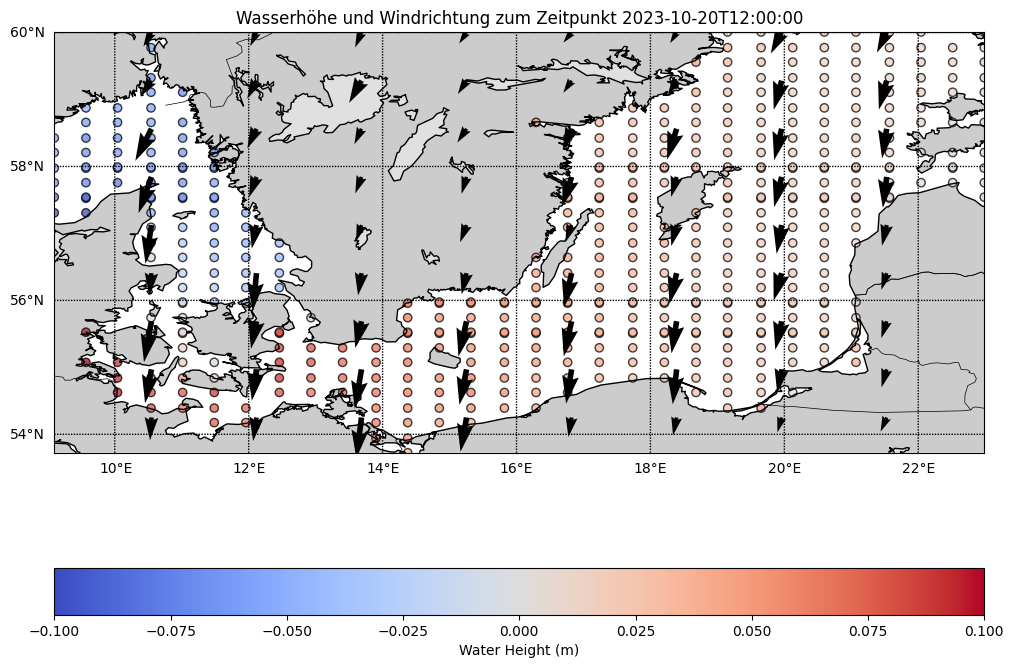

In [20]:
windmap = WindWaterMap(
    df_weather=df_weather,
    df_ocean=df_ocean,
    timepoint=timepoint,
    ocean_feature="sla",
    ocean_grid_size=50,
    weather_grid_size=10,
)
fig, ax = windmap.plot()
plt.show()

# In Situ Data

In [21]:
insitu_data = 'NO_TS_TG_FlensburgTG.nc'
file_path = Path("../data/observation") / insitu_data
ds_insitu = xr.open_dataset(file_path)

df_insitu = ds_insitu.to_dataframe().reset_index()
print(df_insitu.info(verbose=True, show_counts=True, memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025912 entries, 0 to 1025911
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   TIME       1025912 non-null  datetime64[ns]
 1   DEPTH      1025912 non-null  int64         
 2   TIME_QC    1025912 non-null  int8          
 3   DEPH       1025912 non-null  float32       
 4   LATITUDE   1025912 non-null  float32       
 5   LONGITUDE  1025912 non-null  float32       
 6   STATION    1025912 non-null  object        
 7   SLEV       1025912 non-null  float32       
 8   SLEV_QC    1025912 non-null  float32       
dtypes: datetime64[ns](1), float32(5), int64(1), int8(1), object(1)
memory usage: 87.1 MB
None


In [22]:
df_insitu['DEPTH'].nunique()   

1

In [23]:
df_insitu = df_insitu.dropna(axis=1, how="all")
df_insitu = df_insitu.dropna(axis=0, how="any")

# Select TIME_QC = 1 and SLEV_QC = 1
# df_insitu = df_insitu[
#     (df_insitu["TIME_QC"] == 1) & (df_insitu["SLEV_QC"] == 1)
# ].reset_index(drop=True)

#df_insitu = df_insitu.drop(columns=["TIME_QC", "SLEV_QC"], axis=1)

# Rename columns
df_insitu = df_insitu.rename(
    columns={
        "DEPTH": "depth",
        "LATITUDE": "latitude",
        "LONGITUDE": "longitude",
        "SLEV": "sla",
        "TIME": "time",
    }
)

df_insitu = process_df(df_insitu)
df_insitu = df_insitu.drop(columns=["depth"], axis=1)
show_df(df_insitu)

,time,TIME_QC,DEPH,latitude,longitude,STATION,sla,SLEV_QC
0,2014-01-19 06:00:00,1,0.0,54.796001,9.434,b'FlensburgTG',0.841,1.0
1,2014-01-19 06:00:00,1,0.0,54.796001,9.434,b'FlensburgTG',0.845,1.0
2,2014-01-19 06:00:00,1,0.0,54.796001,9.434,b'FlensburgTG',0.842,1.0
3,2014-01-19 06:00:00,1,0.0,54.796001,9.434,b'FlensburgTG',0.837,1.0
4,2014-01-19 07:00:00,1,0.0,54.796001,9.434,b'FlensburgTG',0.829,1.0


,time,TIME_QC,DEPH,latitude,longitude,STATION,sla,SLEV_QC
1025907,2025-03-31 23:00:00,1,0.0,54.796001,9.434,b'FlensburgTG',-0.05,1.0
1025908,2025-03-31 23:00:00,1,0.0,54.796001,9.434,b'FlensburgTG',-0.04,1.0
1025909,2025-04-01 00:00:00,1,0.0,54.796001,9.434,b'FlensburgTG',-0.03,1.0
1025910,2025-04-01 00:00:00,1,0.0,54.796001,9.434,b'FlensburgTG',-0.02,1.0
1025911,2025-04-01 00:00:00,1,0.0,54.796001,9.434,b'FlensburgTG',0.00,1.0


Columns: ['time', 'TIME_QC', 'DEPH', 'latitude', 'longitude', 'STATION', 'sla', 'SLEV_QC']
Number of unique coordinates: 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025912 entries, 0 to 1025911
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   time       1025912 non-null  datetime64[ns]
 1   TIME_QC    1025912 non-null  int8          
 2   DEPH       1025912 non-null  float32       
 3   latitude   1025912 non-null  float32       
 4   longitude  1025912 non-null  float32       
 5   STATION    1025912 non-null  object        
 6   sla        1025912 non-null  float32       
 7   SLEV_QC    1025912 non-null  float32       
dtypes: datetime64[ns](1), float32(5), int8(1), object(1)
memory usage: 79.2 MB
None
time         0
TIME_QC      0
DEPH         0
latitude     0
longitude    0
STATION      0
sla          0
SLEV_QC      0
dtype: int64


,time,TIME_QC,DEPH,latitude,longitude,sla,SLEV_QC
count,1025912,1025912.0,1025912.0,1.025912e+06,1.025912e+06,1.025912e+06,1.025912e+06
mean,2018-01-12 09:07:09.450869248,1.0,0.0,5.479593e+01,9.434002e+00,5.509176e-02,1.238689e+00
min,2014-01-19 06:00:00,1.0,0.0,5.479600e+01,9.434000e+00,-1.720000e+00,1.000000e+00
25%,2015-10-04 20:00:00,1.0,0.0,5.479600e+01,9.434000e+00,-7.800000e-02,1.000000e+00
50%,2016-04-03 17:00:00,1.0,0.0,5.479600e+01,9.434000e+00,6.200000e-02,1.000000e+00
75%,2020-05-15 07:15:00,1.0,0.0,5.479600e+01,9.434000e+00,1.920000e-01,1.000000e+00
max,2025-04-01 00:00:00,1.0,0.0,5.479600e+01,9.434000e+00,1.671000e+01,3.000000e+00
std,NaN,0.0,0.0,0.000000e+00,0.000000e+00,2.483888e-01,6.483873e-01


Fehlende Zeitpunkte erkannt:
2215     2014-02-03 18:00:00
10036    2014-03-30 03:00:00
24144    2014-07-07 06:00:00
26669    2014-07-27 03:00:00
27549    2014-08-03 18:00:00
                 ...        
766141   2020-04-21 23:00:00
768969   2020-05-11 23:00:00
769096   2020-05-12 23:00:00
769504   2020-05-15 23:00:00
769955   2020-05-19 04:00:00
Name: time, Length: 102, dtype: datetime64[ns]
